In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pylab import rcParams
from sklearn import preprocessing

import scipy
from scipy.stats.stats import pearsonr

In [60]:
%matplotlib inline
pylab.rcParams[ 'figure.figsize' ] = 5 , 4
sns.set_style('whitegrid')

In [61]:
Transit_Reviews=pd.read_csv("transitfinal3and.csv", usecols=['Hotel_Name','transit_count','Review_Count'])
Transit_Reviews = Transit_Reviews.drop_duplicates()
Transit_Reviews.index = pd.RangeIndex(start=0, stop=len(Transit_Reviews), step=1)
Transit_Reviews.to_csv('transitfinal3and.csv')
Transit=pd.read_csv("transitfinal3and.csv", usecols=['Hotel_Name','transit_count','Review_Count'])



In [62]:
Hotel_Reviews=pd.read_csv("Hotel_Reviews.csv",usecols=['Hotel_Name','Reviewer_Score'])
Hotel_Reviews.head()

,Hotel_Name,Reviewer_Score
0,Hotel Arena,2.9
1,Hotel Arena,7.5
2,Hotel Arena,7.1
3,Hotel Arena,3.8
4,Hotel Arena,6.7


In [63]:
Hotel_name=np.array([])
mean_reviewer_score=np.array([])

In [64]:
Hotels=Hotel_Reviews.Hotel_Name.unique()

In [65]:
for Hotel in Hotels:
    TEMP=Hotel_Reviews.loc[Hotel_Reviews['Hotel_Name']==Hotel]
    TEMP=TEMP.reset_index()
    Hotel_name=np.append(Hotel_name,Hotel)
    
    mean_reviewer_score=np.append(mean_reviewer_score, TEMP['Reviewer_Score'].mean())

In [66]:
column1=['Hotel_name','mean_reviewer_score']

In [67]:
data1=np.column_stack((Hotel_name, mean_reviewer_score))

In [68]:
HotelReviews=pd.DataFrame(data1, columns=column1)
HotelReviews['mean_reviewer_score']=pd.to_numeric(HotelReviews['mean_reviewer_score'])
HotelReviews=HotelReviews[['mean_reviewer_score']]
HotelReviews

,mean_reviewer_score
0,7.836296
1,8.602827
2,9.298843
3,7.711469
4,8.848571
5,5.852632
6,8.029333
7,8.369546
8,9.144853
9,9.142520


In [69]:
Connections=pd.concat([Transit_Reviews, HotelReviews], ignore_index=False, axis=1)
Connect = Connections[Connections.transit_count!='-']

Connect['transit_count']=Connect['transit_count'].astype(str).astype(int)
Connect

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Hotel_Name,transit_count,Review_Count,mean_reviewer_score
0,Hotel Arena,0,405.0,7.836296
1,K K Hotel George,1,566.0,8.602827
2,Apex Temple Court Hotel,0,1037.0,9.298843
3,The Park Grand London Paddington,0,1770.0,7.711469
4,Monhotel Lounge SPA,0,35.0,8.848571
5,Kube Hotel Ice Bar,0,19.0,5.852632
6,The Principal London,0,1425.0,8.029333
7,Park Plaza County Hall London,0,2223.0,8.369546
8,One Aldwych,1,136.0,9.144853
9,Splendid Etoile,2,127.0,9.142520


In [70]:
bins = [0, 5, 10, 15, 20]

In [71]:
group_names = ['low', 'average', 'good', 'excellent']

In [72]:
Connect['transit_groups']=pd.cut(Connect['transit_count'], bins, labels=group_names)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
Connect.head()

,Hotel_Name,transit_count,Review_Count,mean_reviewer_score,transit_groups
0,Hotel Arena,0,405.0,7.836296,NaN
1,K K Hotel George,1,566.0,8.602827,low
2,Apex Temple Court Hotel,0,1037.0,9.298843,NaN
3,The Park Grand London Paddington,0,1770.0,7.711469,NaN
4,Monhotel Lounge SPA,0,35.0,8.848571,NaN


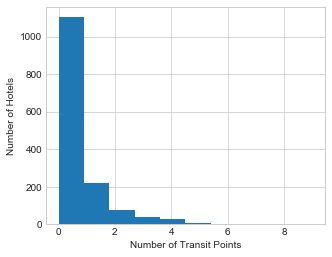

In [74]:
plt.hist(Connect['transit_count'])
plt.xlabel('Number of Transit Points')
plt.ylabel('Number of Hotels')
plt.show()

In [75]:
meanTransit=Connect['transit_count'].mean()
stdTransit=Connect['transit_count'].std()
Connect['scaled_Transit']=(Connect['transit_count']-meanTransit)/stdTransit

meanScore=Connect['mean_reviewer_score'].mean()
stdScore=Connect['mean_reviewer_score'].std()
Connect['scaled_Score']=(Connect['mean_reviewer_score']-meanScore)/stdScore

meanReview=Connect['Review_Count'].mean()
stdReview=Connect['Review_Count'].std()
Connect['scaled_Review']=(Connect['Review_Count']-meanReview)/stdReview

Connect.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,Hotel_Name,transit_count,Review_Count,mean_reviewer_score,transit_groups,scaled_Transit,scaled_Score,scaled_Review
0,Hotel Arena,0,405.0,7.836296,NaN,-0.466364,-1.013734,0.138571
1,K K Hotel George,1,566.0,8.602827,low,0.575723,0.215830,0.508409
2,Apex Temple Court Hotel,0,1037.0,9.298843,NaN,-0.466364,1.332284,1.590357
3,The Park Grand London Paddington,0,1770.0,7.711469,NaN,-0.466364,-1.213965,3.274154
4,Monhotel Lounge SPA,0,35.0,8.848571,NaN,-0.466364,0.610020,-0.711368


In [76]:
Connect=Connect.take([0,5,6,7],axis=1)

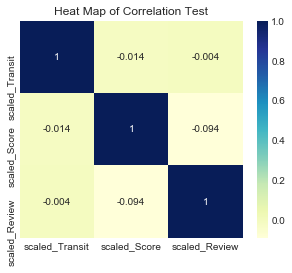

In [77]:
correlation= Connect.corr()

sns.heatmap(correlation,annot=True,cbar=True,cmap="YlGnBu")
plt.title("Heat Map of Correlation Test")
plt.show()